<a href="https://colab.research.google.com/github/melanieyes/vae-image-gen/blob/main/variation_auto_encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 16.4MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 496kB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.59MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 7.41MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 12, 12]           4,640
              ReLU-5           [-1, 32, 12, 12]               0
         MaxPool2d-6             [-1, 32, 6, 6]               0
            Conv2d-7             [-1, 64, 1, 1]          73,792
   ConvTranspose2d-8             [-1, 32, 7, 7]         100,384
              ReLU-9             [-1, 32, 7, 7]               0
  ConvTranspose2d-10           [-1, 16, 14, 14]           4,624
             ReLU-11           [-1, 16, 14, 14]               0
  ConvTranspose2d-12            [-1, 1, 28, 28]             145
          Sigmoid-13            

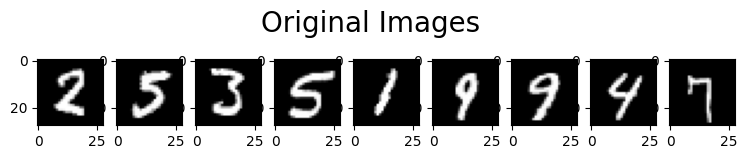

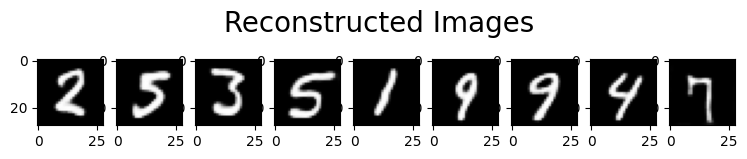

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchsummary import summary
from torch.autograd import Variable
import matplotlib.pyplot as plt


# Loading The Dataset and Creating The Data Loader to iterate Over The Data
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    transform = transforms.ToTensor(),
    download = True,
)

train_data_loader = torch.utils.data.DataLoader(dataset=train_data,batch_size=64,shuffle=True)

# defining our Convolution Autoencoder Architecture

class Convolution_Autoencoder(nn.Module):
    def __init__(self):
        super(Convolution_Autoencoder , self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, 3 , padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
            nn.Conv2d(16, 32, 3, stride=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=(2,2) , stride=(2,2)),
            nn.Conv2d(32, 64, 6)
        )

        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, 7),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 16, 3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded_data = self.encoder(x)
        decoded_data = self.decoder(encoded_data)
        return decoded_data

# visualizing The Architecture
model = Convolution_Autoencoder().cuda()
summary(model , (1 , 28 , 28))
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=1e-5)

# Training The Model
number_of_epochs = 10
results = []
for epoch in range(number_of_epochs):
    for (img, _) in train_data_loader:
        #img = img.reshape(-1 , 784)
        img = Variable(img).cuda()
        reconstructed_image = model(img)
        loss = loss_function(reconstructed_image, img)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    results.append((epoch, img, reconstructed_image))

# Visualizing The Result
def plot_result(autoEncoder_result , nbr_epoch):
    original_images = autoEncoder_result[ nbr_epoch -1 ][1].cpu().data.numpy()
    reconstructed_images = autoEncoder_result[ nbr_epoch -1 ][2].cpu().data.numpy()

    # Plot The Original Images
    plt.figure(figsize=(9, 3))
    plt.gray()
    for index, image in zip(range(9) , original_images):
            plt.subplot(2, 9, index+1)
            image = image.reshape(-1, 28,28)
            plt.imshow(image[0])
    plt.suptitle(f"Original Images " , fontsize = 20)

    # Plot The Reconstructed images
    plt.figure(figsize=(9, 3))
    plt.gray()
    for index, image in zip(range(9), reconstructed_images):
        plt.subplot(2, 9, index+1)
        image = image.reshape(-1, 28,28)
        plt.imshow(image[0])
    plt.suptitle(" Reconstructed Images" , fontsize = 20)

plot_result(results , number_of_epochs)

In [ ]:
!pip install torch torchvision matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class Encoder(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc_mu = nn.Linear(hidden_dim, latent_dim)
        self.fc_logvar = nn.Linear(hidden_dim, latent_dim)

    def forward(self, x):
        h = torch.relu(self.fc1(x))
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

class Decoder(nn.Module):
    def __init__(self, latent_dim, hidden_dim, output_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, z):
        h = torch.relu(self.fc1(z))
        x_hat = torch.sigmoid(self.fc2(h))
        return x_hat

class VAE(nn.Module):
    def __init__(self, input_dim, hidden_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = Encoder(input_dim, hidden_dim, latent_dim)
        self.decoder = Decoder(latent_dim, hidden_dim, input_dim)

    def forward(self, x):
        mu, logvar = self.encoder(x)
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        z = mu + eps * std
        x_hat = self.decoder(z)
        return x_hat, mu, logvar

In [ ]:
def loss_function(x, x_hat, mu, logvar):
    BCE = nn.functional.binary_cross_entropy(x_hat, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD



In [ ]:
# Hyperparameters
input_dim = 784
hidden_dim = 400
latent_dim = 20
lr = 1e-3
batch_size = 128
epochs = 10
# Data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
# Model, optimizer
vae = VAE(input_dim, hidden_dim, latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=lr)
# Training loop
vae.train()
for epoch in range(epochs):
    train_loss = 0
    for x, _ in train_loader:
        x = x.view(-1, input_dim)
        optimizer.zero_grad()
        x_hat, mu, logvar = vae(x)
        loss = loss_function(x, x_hat, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f"Epoch {epoch + 1}, Loss: {train_loss / len(train_loader.dataset)}")

Epoch 1, Loss: 164.34363413085939
Epoch 2, Loss: 121.195762109375
Epoch 3, Loss: 114.42022426757812
Epoch 4, Loss: 111.44690291341146
Epoch 5, Loss: 109.77658391927083
Epoch 6, Loss: 108.67490520833333
Epoch 7, Loss: 107.82513491210938
Epoch 8, Loss: 107.20345721028646
Epoch 9, Loss: 106.6559958984375
Epoch 10, Loss: 106.24858188476563


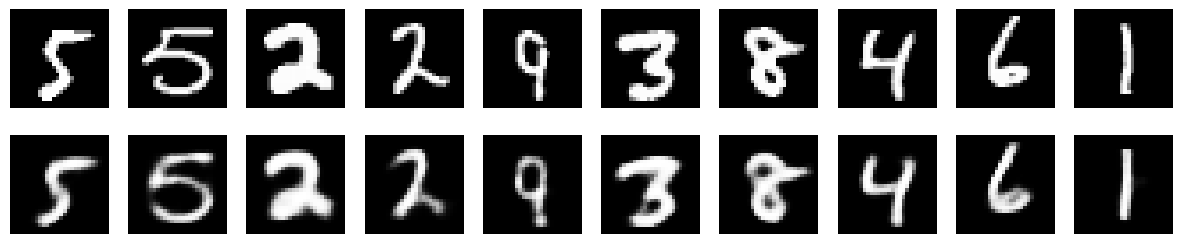

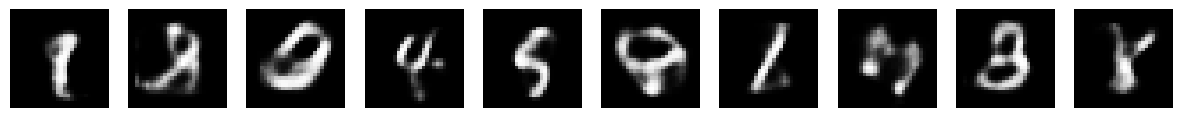

In [ ]:
# visualizing reconstructed outputs
vae.eval()
with torch.no_grad():
    x, _ = next(iter(train_loader))
    x = x.view(-1, input_dim)
    x_hat, _, _ = vae(x)
    x = x.view(-1, 28, 28)
    x_hat = x_hat.view(-1, 28, 28)

    fig, axs = plt.subplots(2, 10, figsize=(15, 3))
    for i in range(10):
        axs[0, i].imshow(x[i].cpu().numpy(), cmap='gray')
        axs[1, i].imshow(x_hat[i].cpu().numpy(), cmap='gray')
        axs[0, i].axis('off')
        axs[1, i].axis('off')
    plt.show()


#visualizing generated samples
with torch.no_grad():
    z = torch.randn(10, latent_dim)
    sample = vae.decoder(z)
    sample = sample.view(-1, 28, 28)

    fig, axs = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axs[i].imshow(sample[i].cpu().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()

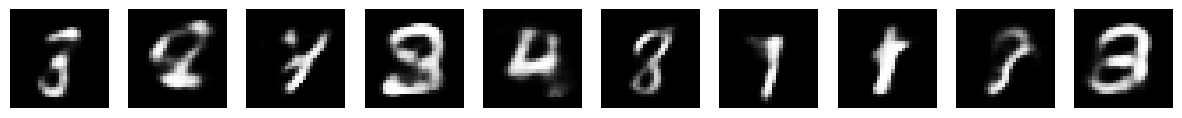

In [ ]:
#visualizing generated samples
with torch.no_grad():
    z = torch.randn(10, latent_dim)
    sample = vae.decoder(z)
    sample = sample.view(-1, 28, 28)

    fig, axs = plt.subplots(1, 10, figsize=(15, 3))
    for i in range(10):
        axs[i].imshow(sample[i].cpu().numpy(), cmap='gray')
        axs[i].axis('off')
    plt.show()

In [ ]:
pip install torch torchvision matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 42.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 72.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets, transforms


In [ ]:
# Data Preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)


In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(28 * 28 + 10, 400)  # Image and one-hot encoded label
        self.fc2_mean = nn.Linear(400, latent_dim)
        self.fc2_logvar = nn.Linear(400, latent_dim)

    def forward(self, x, labels):
        # Concatenate image and label
        x = torch.cat((x.view(-1, 28 * 28), labels), dim=-1)
        x = torch.relu(self.fc1(x))
        mean = self.fc2_mean(x)
        logvar = self.fc2_logvar(x)
        return mean, logvar


In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + 10, 400)
        self.fc2 = nn.Linear(400, 28 * 28)

    def forward(self, z, labels):
        # Concatenate z (latent vector) and label
        z = torch.cat((z, labels), dim=-1)
        x = torch.relu(self.fc1(z))
        x = torch.sigmoid(self.fc2(x))
        return x.view(-1, 28, 28)


In [ ]:
class CVAE(nn.Module):
    def __init__(self, latent_dim):
        super(CVAE, self).__init__()
        self.encoder = Encoder(latent_dim)
        self.decoder = Decoder(latent_dim)

    def reparameterize(self, mean, logvar):
        # Sampling from a normal distribution using reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def forward(self, x, labels):
        mean, logvar = self.encoder(x, labels)
        z = self.reparameterize(mean, logvar)
        recon_x = self.decoder(z, labels)
        return recon_x, mean, logvar


In [ ]:
def loss_function(recon_x, x, mean, logvar):
    BCE = nn.functional.binary_cross_entropy(
        recon_x.view(-1, 28 * 28), x.view(-1, 28 * 28), reduction='sum')

    # KL divergence
    # -0.5 * sum(1 + log(sigma^2) - mu^2 - sigma^2)
    # where mu is mean and sigma is std from encoder output
    KL_div = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())

    return BCE + KL_div


In [ ]:
# Set latent dimension
latent_dim = 20

# Instantiate the model, optimizer, and device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CVAE(latent_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

# Training loop
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        # One-hot encode labels
        # labels = torch.eye(10)[target].to(device)
        # One-hot encode labels, ensuring torch.eye is on the correct device
        labels = torch.eye(10, device=device)[target].to(device)
        # Forward pass
        recon_batch, mean, logvar = model(data, labels)

        # Compute the loss
        loss = loss_function(recon_batch, data, mean, logvar)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    # Print training loss after each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader.dataset)}")


Epoch [1/30], Loss: 162.92259029947917
Epoch [2/30], Loss: 119.33111769205729
Epoch [3/30], Loss: 112.30698474934896
Epoch [4/30], Loss: 109.13413587239583
Epoch [5/30], Loss: 107.12606673177083
Epoch [6/30], Loss: 105.60449469401041
Epoch [7/30], Loss: 104.58303699544271
Epoch [8/30], Loss: 103.77604456380209
Epoch [9/30], Loss: 103.14549244791667
Epoch [10/30], Loss: 102.565466015625
Epoch [11/30], Loss: 102.08425056966146
Epoch [12/30], Loss: 101.74973849283855
Epoch [13/30], Loss: 101.37136940104166
Epoch [14/30], Loss: 101.0849201985677
Epoch [15/30], Loss: 100.79589054361979
Epoch [16/30], Loss: 100.51758227539062
Epoch [17/30], Loss: 100.31683597005208
Epoch [18/30], Loss: 100.10250392252604
Epoch [19/30], Loss: 99.93243092447916
Epoch [20/30], Loss: 99.78299518229167
Epoch [21/30], Loss: 99.57866604817708
Epoch [22/30], Loss: 99.41351822916667
Epoch [23/30], Loss: 99.31603302408854
Epoch [24/30], Loss: 99.1445862467448
Epoch [25/30], Loss: 99.00627985026041
Epoch [26/30], Loss:

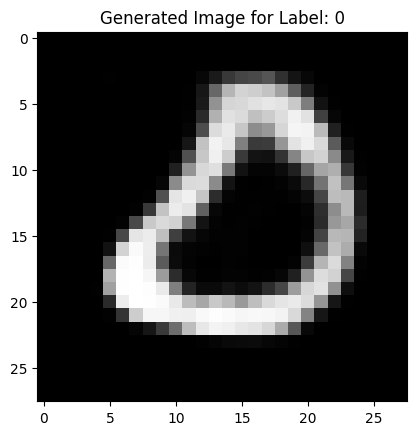

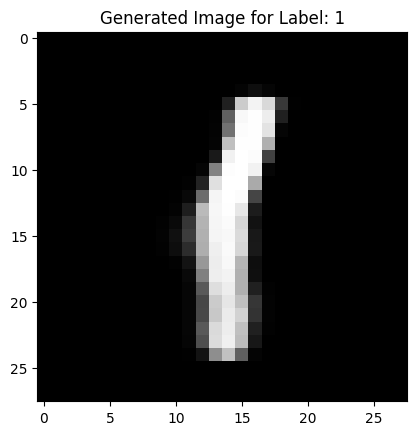

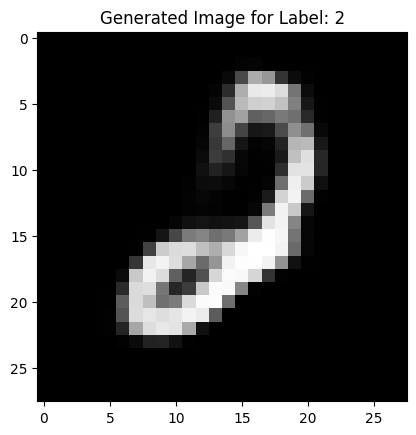

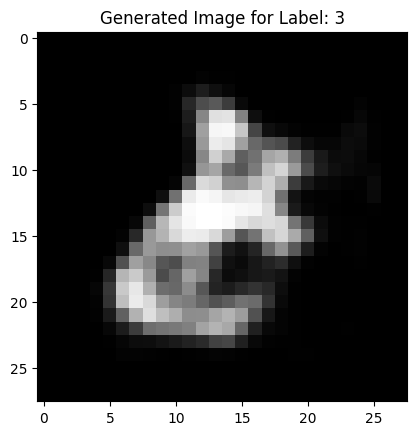

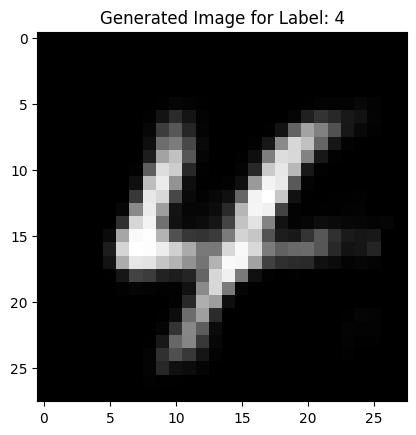

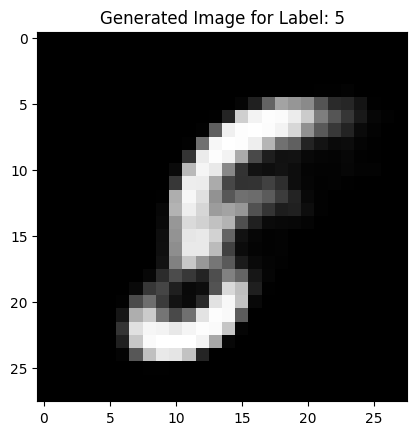

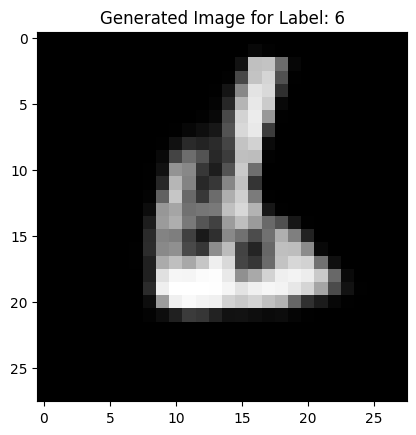

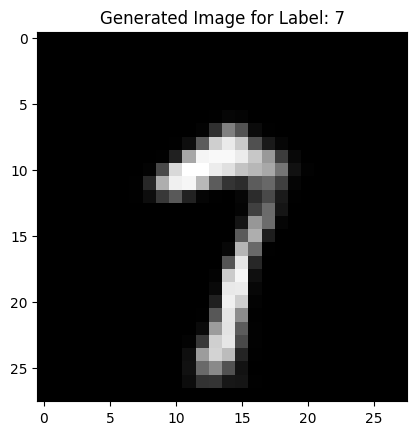

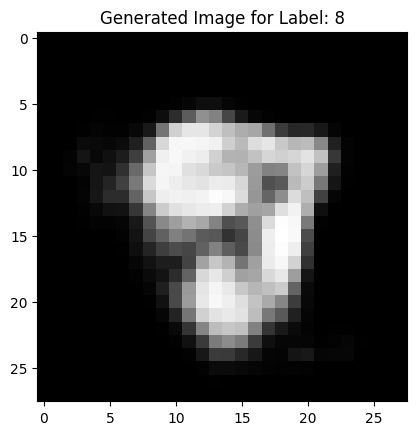

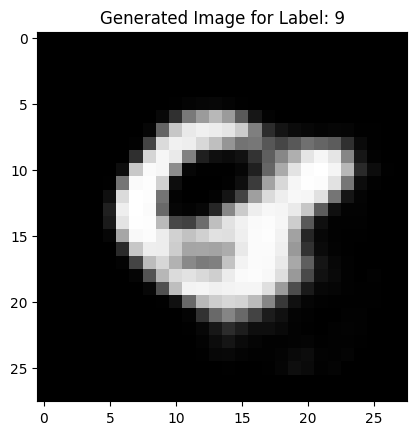

In [ ]:
# Function to generate images using the decoder
def generate_image(model, label, latent_dim=20):
    model.eval()
    with torch.no_grad():
        z = torch.randn(1, latent_dim).to(device)
        label_one_hot = torch.eye(10)[label].unsqueeze(0).to(device)
        generated_image = model.decoder(z, label_one_hot).cpu().numpy().reshape(28, 28)

    plt.imshow(generated_image, cmap='gray')
    plt.title(f"Generated Image for Label: {label}")
    plt.show()

# Generate images for each label
for label in range(10):
    generate_image(model, label)


In [ ]:
!pip install torch torchvision matplotlib gensim nltk


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import nltk
from gensim.models import Word2Vec

# Download necessary resources for NLTK
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Text labels corresponding to digits
text_labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']

# Tokenize text labels using NLTK tokenizer
tokenized_labels = [nltk.word_tokenize(label) for label in text_labels]

# Train a Word2Vec model on the tokenized labels
word2vec_model = Word2Vec(sentences=tokenized_labels, vector_size=10, window=1, min_count=1, sg=0)

# Extract Word2Vec embeddings for each label
label_embeddings = {label: word2vec_model.wv[label] for label in text_labels}

# Print example embedding for 'zero'
print("Embedding for 'zero':", label_embeddings['zero'])


Embedding for 'zero': [ 0.01631476  0.00189917  0.03473637  0.00217777  0.09618826  0.05060603
 -0.0891739  -0.0704156   0.00901456  0.06392534]


In [ ]:
class Encoder(nn.Module):
    def __init__(self, latent_dim, embed_dim):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(28 * 28 + embed_dim, 400)  # Image and label embedding
        self.fc2_mean = nn.Linear(400, latent_dim)
        self.fc2_logvar = nn.Linear(400, latent_dim)

    def forward(self, x, label_emb):
        # Concatenate image and label embedding
        x = torch.cat((x.view(-1, 28 * 28), label_emb), dim=-1)
        x = torch.relu(self.fc1(x))
        mean = self.fc2_mean(x)
        logvar = self.fc2_logvar(x)
        return mean, logvar


In [ ]:
class Decoder(nn.Module):
    def __init__(self, latent_dim, embed_dim):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(latent_dim + embed_dim, 400)
        self.fc2 = nn.Linear(400, 28 * 28)

    def forward(self, z, label_emb):
        # Concatenate latent vector and label embedding
        z = torch.cat((z, label_emb), dim=-1)
        x = torch.relu(self.fc1(z))
        x = torch.sigmoid(self.fc2(x))
        return x.view(-1, 28, 28)


In [ ]:
class CVAE(nn.Module):
    def __init__(self, latent_dim, embed_dim):
        super(CVAE, self).__init__()
        self.encoder = Encoder(latent_dim, embed_dim)
        self.decoder = Decoder(latent_dim, embed_dim)

    def reparameterize(self, mean, logvar):
        # Sampling from a normal distribution using reparameterization trick
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mean + eps * std

    def forward(self, x, label_emb):
        mean, logvar = self.encoder(x, label_emb)
        z = self.reparameterize(mean, logvar)
        recon_x = self.decoder(z, label_emb)
        return recon_x, mean, logvar


In [ ]:
def loss_function(recon_x, x, mean, logvar):
    BCE = nn.functional.binary_cross_entropy(
        recon_x.view(-1, 28 * 28), x.view(-1, 28 * 28), reduction='sum')

    # KL divergence
    KL_div = -0.5 * torch.sum(1 + logvar - mean.pow(2) - logvar.exp())

    return BCE + KL_div


In [ ]:
# Data Preprocessing
transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=128, shuffle=True)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False)


100%|██████████| 9.91M/9.91M [00:00<00:00, 17.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 482kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.10MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.53MB/s]


In [ ]:
latent_dim = 20
embed_dim = 10  # Dimension of label embedding (Word2Vec dimension)
batch_size = 128

transform = transforms.Compose([transforms.ToTensor(), transforms.Lambda(lambda x: x.view(-1))])

train_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CVAE(latent_dim, embed_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)

        # Map numeric labels to Word2Vec embeddings
        label_emb = torch.stack([torch.tensor(label_embeddings[text_labels[label]], dtype=torch.float32) for label in target]).to(device)

        # Forward pass
        recon_batch, mean, logvar = model(data, label_emb)

        # Compute the loss
        loss = loss_function(recon_batch, data, mean, logvar)

        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss / len(train_loader.dataset)}")


Epoch [1/100], Loss: 165.93544583333335
Epoch [2/100], Loss: 121.64886505533855
Epoch [3/100], Loss: 114.15291070963542
Epoch [4/100], Loss: 110.93150063476563
Epoch [5/100], Loss: 109.05311583658855
Epoch [6/100], Loss: 107.83409558919271
Epoch [7/100], Loss: 106.88131422526041
Epoch [8/100], Loss: 106.13459187825521
Epoch [9/100], Loss: 105.52488722330729
Epoch [10/100], Loss: 105.08083123372396
Epoch [11/100], Loss: 104.65145945638021
Epoch [12/100], Loss: 104.33223666992187
Epoch [13/100], Loss: 104.02517293294271
Epoch [14/100], Loss: 103.66296391601563
Epoch [15/100], Loss: 103.47486917317708
Epoch [16/100], Loss: 103.22498387044271
Epoch [17/100], Loss: 102.99562112630208
Epoch [18/100], Loss: 102.77033901367187
Epoch [19/100], Loss: 102.60487672526041
Epoch [20/100], Loss: 102.43860192057292
Epoch [21/100], Loss: 102.26679775390625
Epoch [22/100], Loss: 102.10787763671875
Epoch [23/100], Loss: 101.9916366373698
Epoch [24/100], Loss: 101.7756475748698
Epoch [25/100], Loss: 101.6

In [ ]:
def generate_image(model, label_text, latent_dim=20):
    model.eval()
    with torch.no_grad():
        # Convert label to Word2Vec embedding
        label_emb = torch.tensor(label_embeddings[label_text],
                                 dtype=torch.float32).unsqueeze(0).to(device)
        # Generate random latent vector
        z = torch.randn(1, latent_dim).to(device)

        generated_image = model.decoder(z, label_emb).cpu().numpy().reshape(28, 28)

    plt.imshow(generated_image, cmap='gray')
    plt.title(f"Generated Image for Label: {label_text}")
    plt.show()

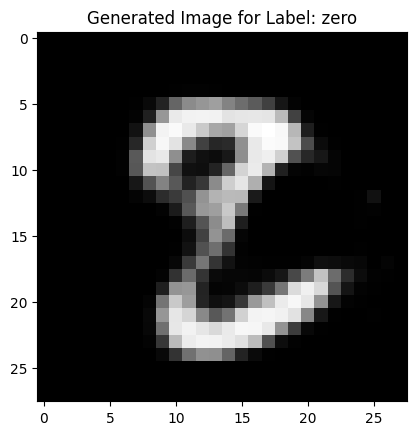

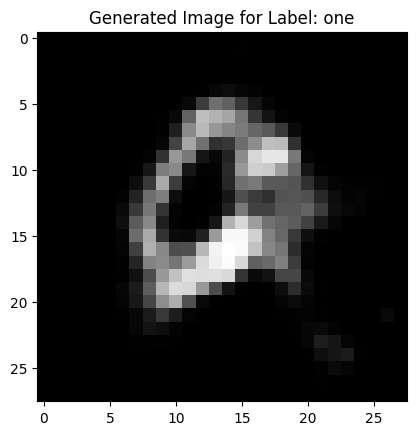

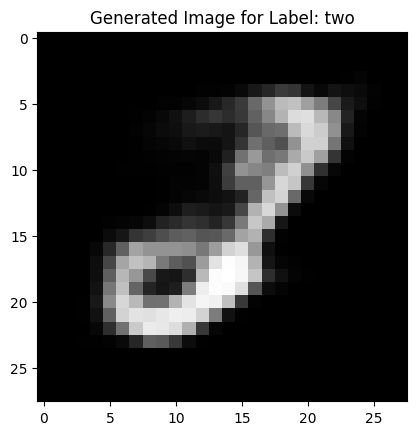

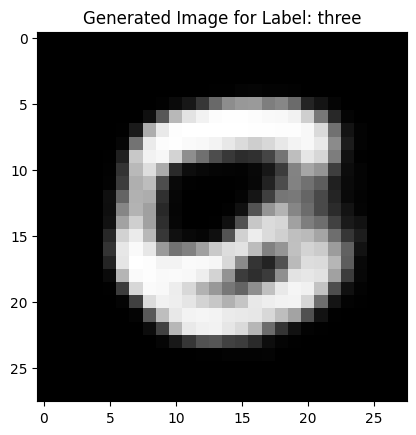

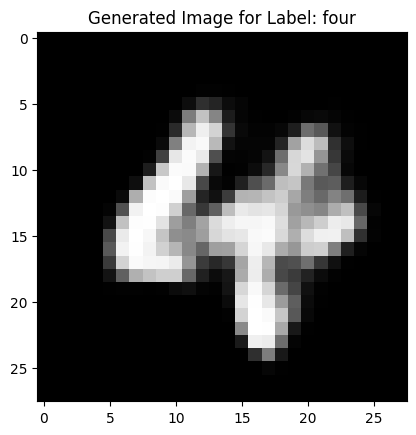

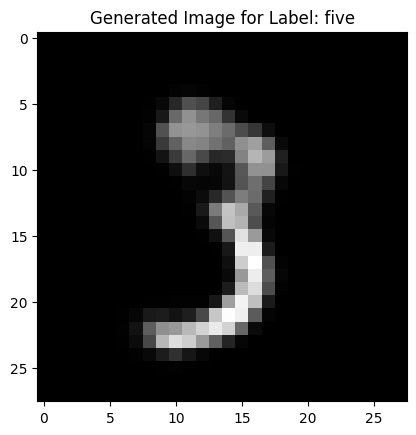

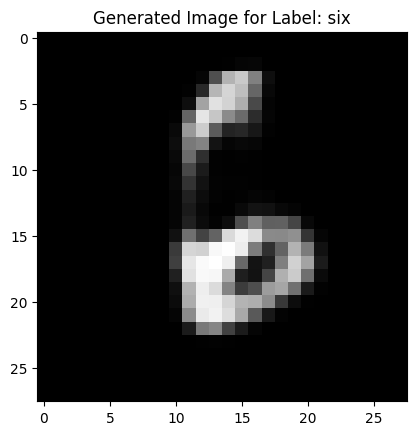

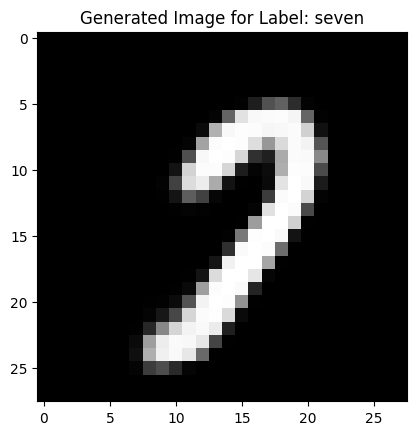

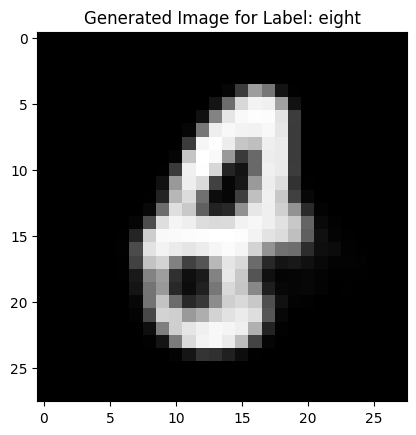

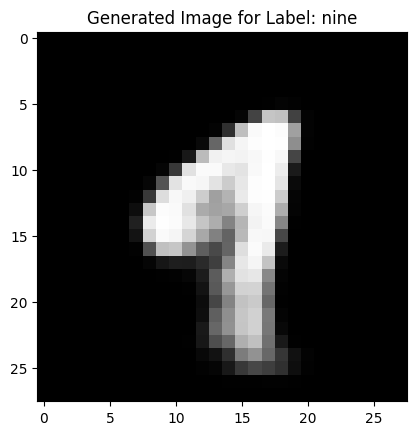

In [ ]:
# Generate images for each label
for label in text_labels:
    generate_image(model, label)